In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import src.util as utils
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTEN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Load Configuration File

In [56]:
config = utils.load_config()

## Preprocessing Data

In [57]:
def read_raw_data(config: dict) -> pd.DataFrame:
    # Return raw dataset
    return pd.read_csv(config["dataset_path"])
    
def split_data(input_data: pd.DataFrame, config: dict):
    # Split predictor and label
    x = input_data.copy()
    x = x.drop(columns = "OUTCOME")
    y = input_data[config["label"]].copy()
    # 1st split train and test
    x_train, x_test, y_train, y_test = train_test_split(
        x, y,
        test_size = config["test_size"],
        random_state = 42,
        stratify = y
    )
    # 2nd split test and valid
    x_valid, x_test, y_valid, y_test = train_test_split(
        x_test, y_test,
        test_size = config["valid_size"],
        random_state = 42,
        stratify = y_test
    )

    return x_train, x_valid, x_test, y_train, y_valid, y_test

def fill_missing_values(df):
    data = df.copy()
    for col in data.columns:
        if data[col].isna().sum() > 1:
            mean_value = data[col].mean()
            data[col].fillna(value=mean_value, inplace=True)

    return data

def resample_data(set_x, set_y):
    sm = SMOTEN(k_neighbors=20, n_jobs=-1)
    X_train_res, y_train_res = sm.fit_resample(set_x, set_y)

    return X_train_res, y_train_res

In [58]:
config = utils.load_config()
raw_dataset = read_raw_data(config)
x_train, x_valid, x_test, y_train, y_valid, y_test = split_data(raw_dataset, config)

In [59]:
X_train_imp = fill_missing_values(x_train)

In [60]:
df_train = pd.concat([X_train_imp, y_train], axis = 1)

[Text(0, 0, '4807'), Text(0, 0, '2193')]

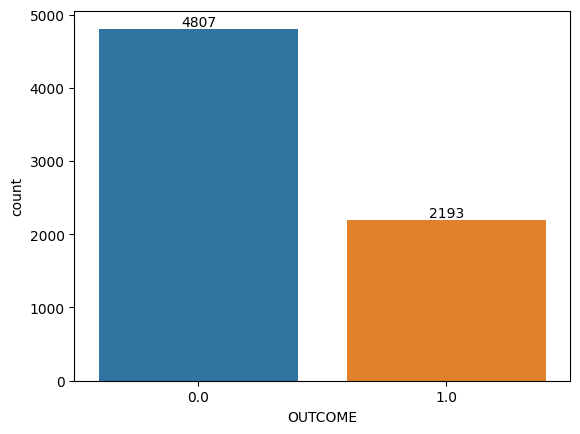

In [63]:
# Check distribution of our label data
ax = sns.countplot(data = df_train, x = "OUTCOME", label = df_train["OUTCOME"].unique())
ax.bar_label(ax.containers[0])

In [61]:
X_train_bal, y_train_bal = resample_data(
        X_train_imp, 
        y_train
    )

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\imblearn\over_sampling\_smote\base.py:858: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [49]:
y_train_bal.value_counts()

0.0    4807
1.0    4807
Name: OUTCOME, dtype: int64

In [50]:
train_set = pd.concat([X_train_bal, y_train_bal], axis = 1)

In [51]:
train_set

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,231661,40-64,male,majority,20-29y,high school,middle class,0.502285,0.0,before 2015,0.0,0.0,10238,14000.000000,sports car,3,0,4,0.0
1,969959,26-39,male,minority,10-19y,high school,working class,0.432879,1.0,before 2015,0.0,1.0,10238,14000.000000,sedan,0,2,0,0.0
2,769065,40-64,male,majority,10-19y,high school,middle class,0.443398,1.0,before 2015,0.0,1.0,92101,12000.000000,sedan,1,1,3,1.0
3,647248,26-39,male,majority,10-19y,university,upper class,0.551589,1.0,after 2015,0.0,1.0,10238,11000.000000,sedan,1,0,0,0.0
4,71738,65+,female,majority,30y+,university,upper class,0.609602,1.0,before 2015,0.0,1.0,10238,12000.000000,sedan,2,1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,7136,26-39,male,majority,10-19y,university,middle class,0.383808,1.0,before 2015,0.0,0.0,32765,11000.000000,sedan,2,0,1,1.0
9610,119690,16-25,male,majority,0-9y,high school,working class,0.187582,0.0,before 2015,0.0,0.0,10238,14000.000000,sedan,0,0,0,1.0
9611,79207,16-25,male,majority,0-9y,high school,poverty,0.166562,1.0,before 2015,0.0,0.0,10238,14000.000000,sedan,0,0,0,1.0
9612,89713,26-39,male,majority,0-9y,high school,working class,0.174759,1.0,before 2015,0.0,0.0,10238,13000.000000,sedan,0,0,0,1.0


## Data Exploration

### Label Distribution

[Text(0, 0, '4807'), Text(0, 0, '4807')]

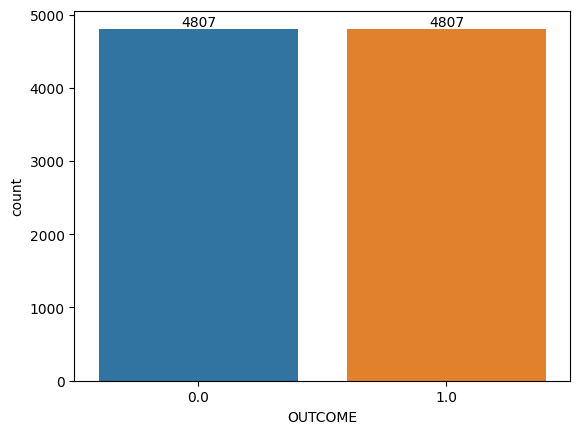

In [53]:
ax = sns.countplot(data = train_set, x = "OUTCOME", label = train_set["OUTCOME"].unique())
ax.bar_label(ax.containers[0])

In [54]:
#categorical features
categorical = train_set.select_dtypes(include =[np.object])
categorical_features = [col for col in categorical.columns]
print("Categorical Features:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= train_set.select_dtypes(include =[np.float64, np.int64])
numerical_features = [col for col in numerical.columns]
print("Numerical Features:",numerical.shape[1])
print(numerical.columns)

Categorical Features: 8
Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')
Numerical Features: 11
Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24876\988967041.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = train_set.select_dtypes(include =[np.object])


### Categorical Features Distribution

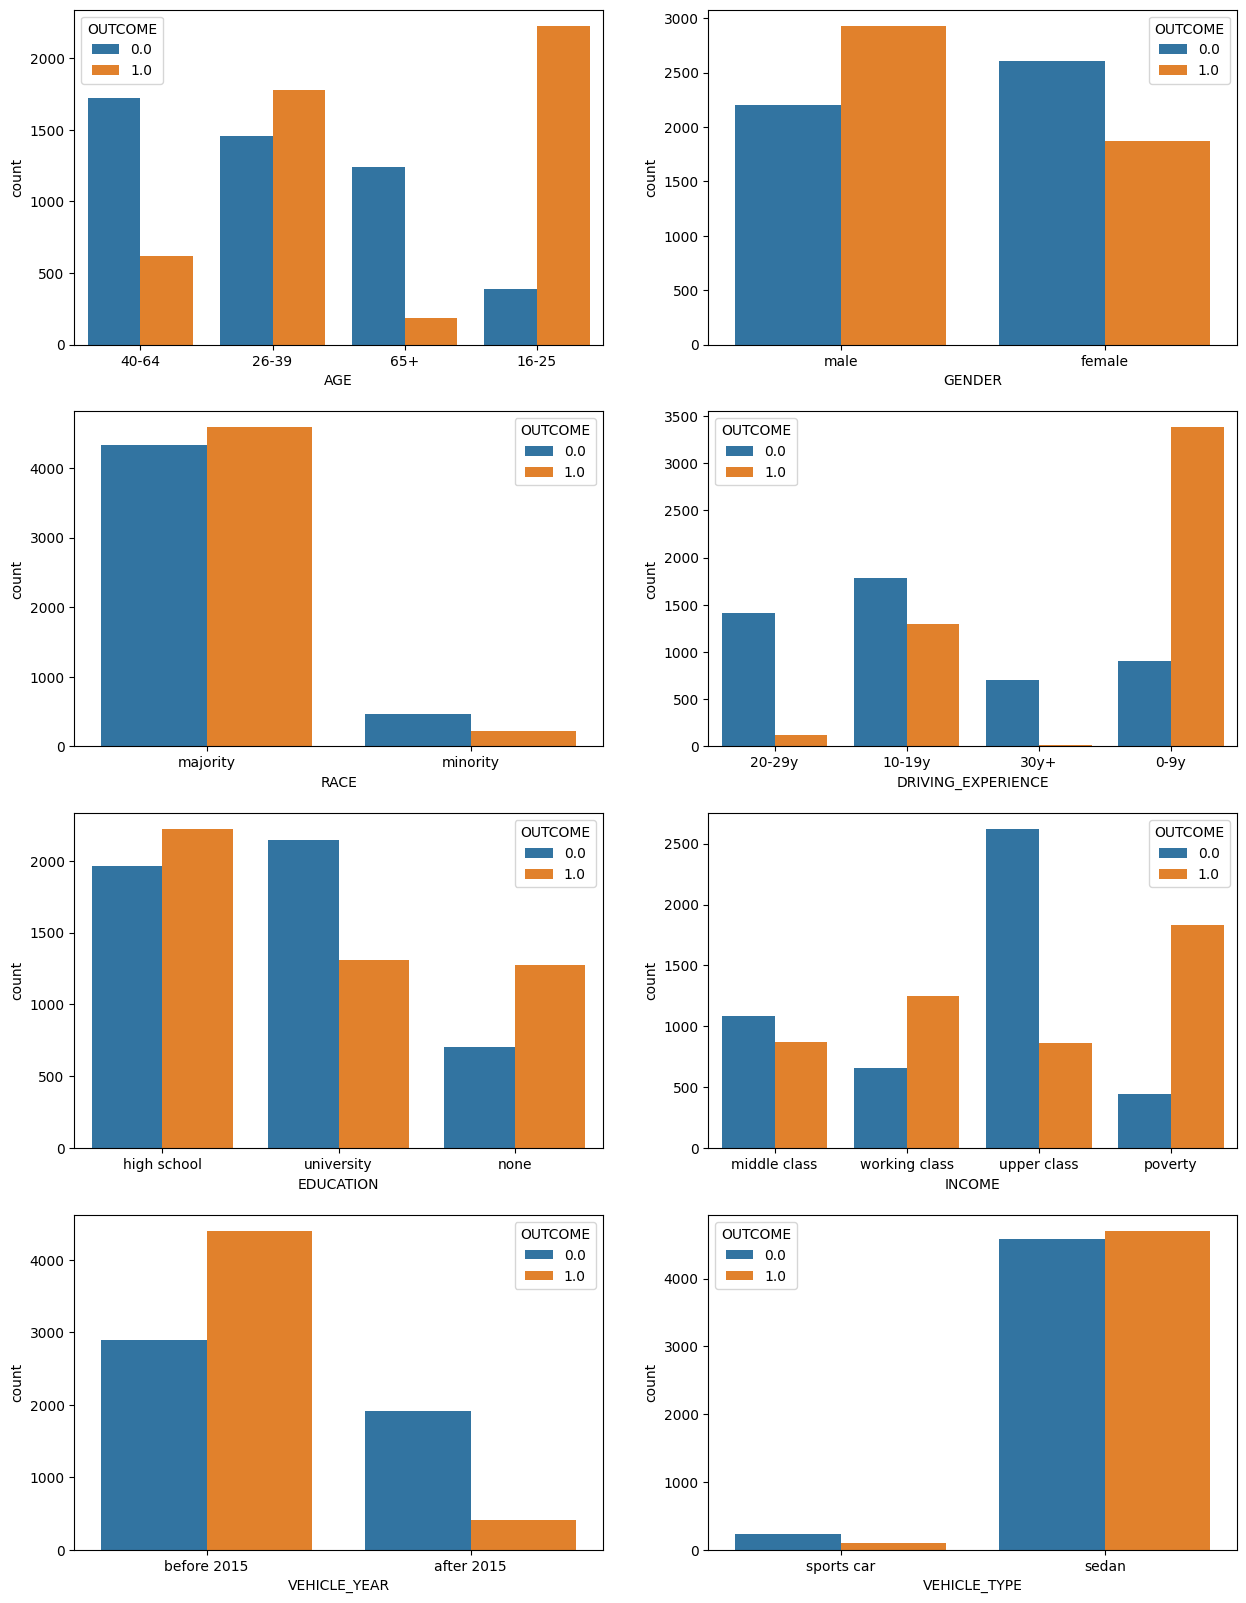

In [55]:
fig, ax = plt.subplots(4, 2, figsize = (15, 20))

for col, ax in zip(categorical_features, ax.flat[:]):
    sns.countplot(data=train_set, x=col, ax=ax, hue="OUTCOME")


### Numerical Features Distribution

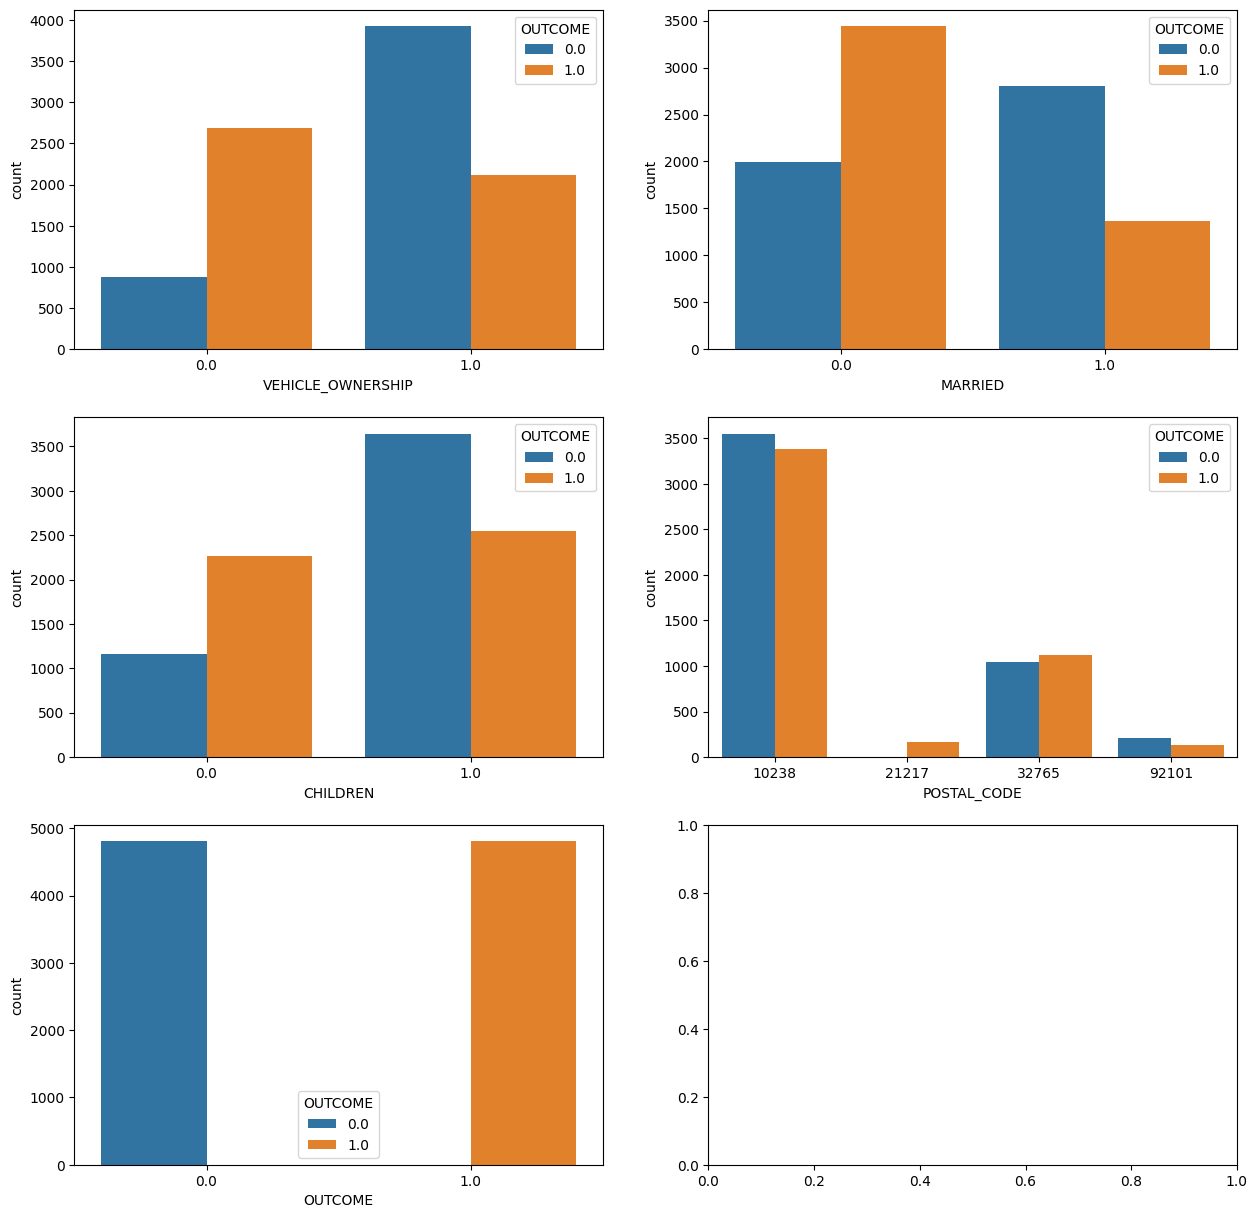

In [32]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
ax = ax.ravel()
i = 0
for col in numerical_features:
  if train_set[col].nunique() < 5:
    sns.countplot(data=train_set, x=col, ax=ax[i], hue="OUTCOME")
    i += 1

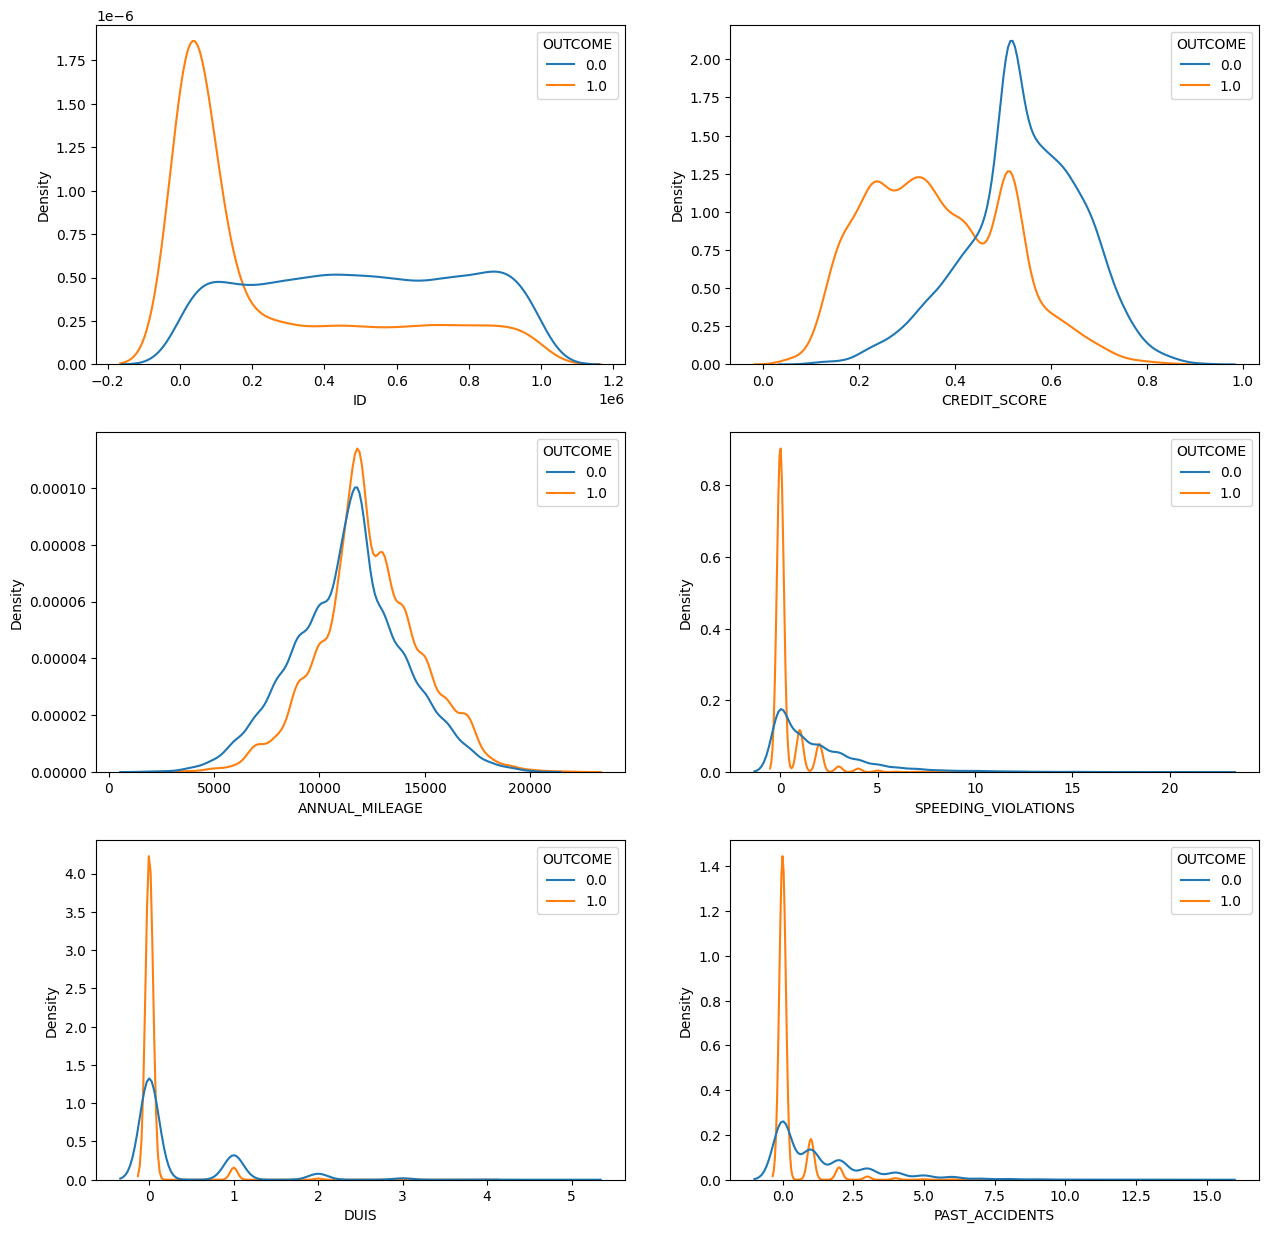

In [33]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
ax = ax.ravel()
i = 0
for col in numerical_features:
  if train_set[col].nunique() > 5:
    sns.kdeplot(data=train_set, x=col, ax=ax[i], hue="OUTCOME")
    i += 1

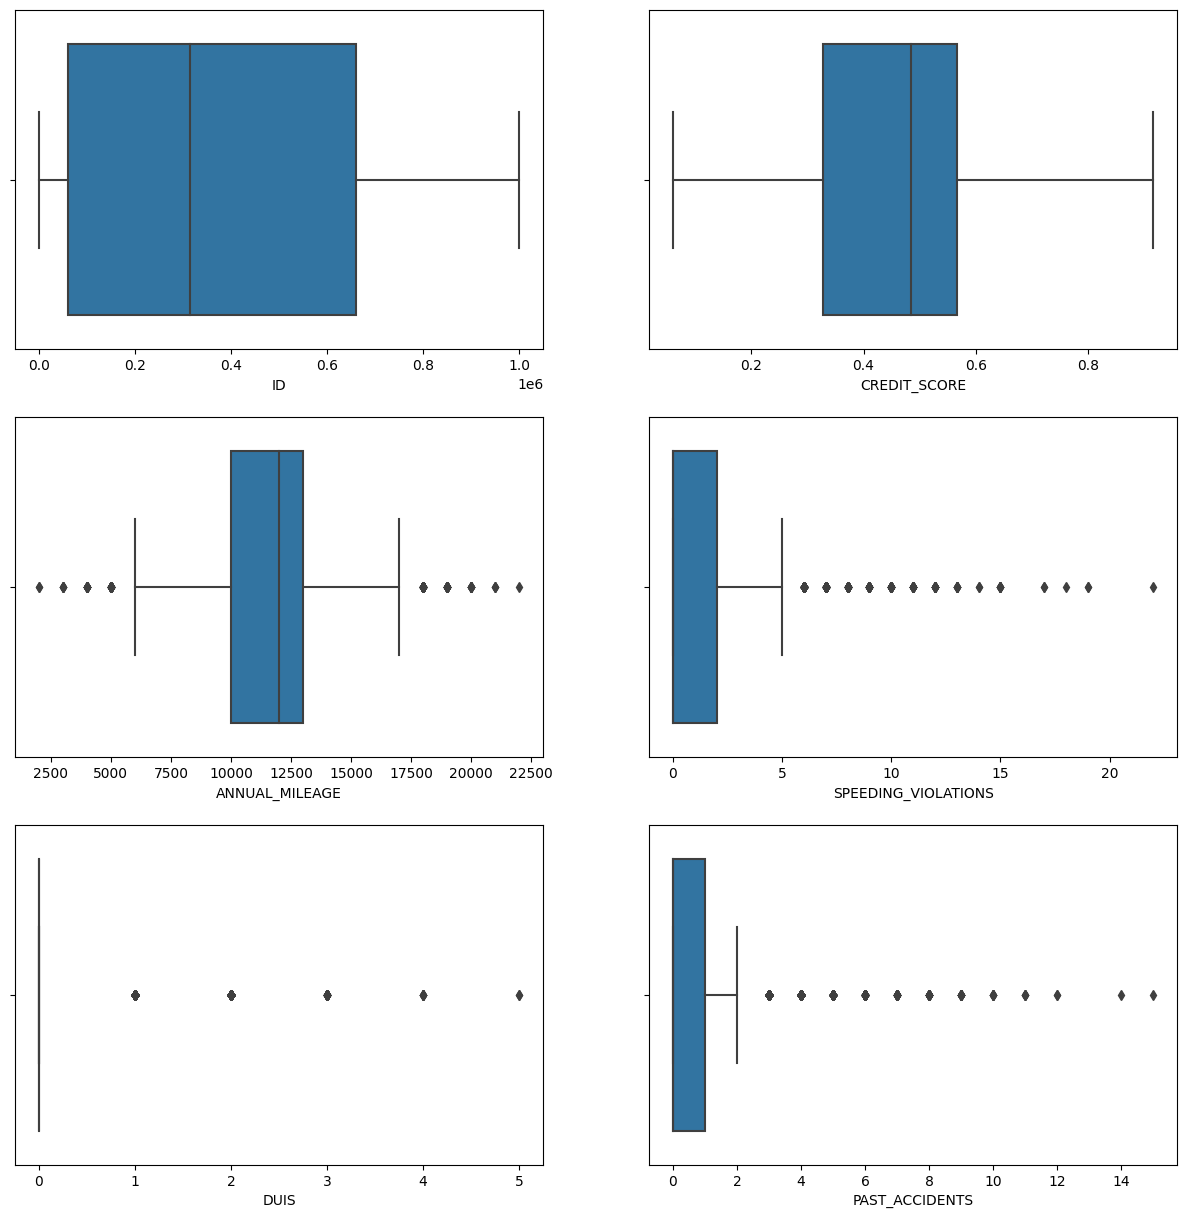

In [34]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
ax = ax.ravel()
i = 0
for col in numerical_features:
  if train_set[col].nunique() > 5:
    sns.boxplot(data=train_set, x=col, ax=ax[i])
    i += 1

### Label Encoder

In [36]:
label_encoder = preprocessing.LabelEncoder()
for col in categorical_features:
  if col == "policy_id":
    continue
  print(col)
  train_set[col]= label_encoder.fit_transform(train_set[col])


AGE
GENDER
RACE
DRIVING_EXPERIENCE
EDUCATION
INCOME
VEHICLE_YEAR
VEHICLE_TYPE


### Correlation Matrix

<AxesSubplot: >

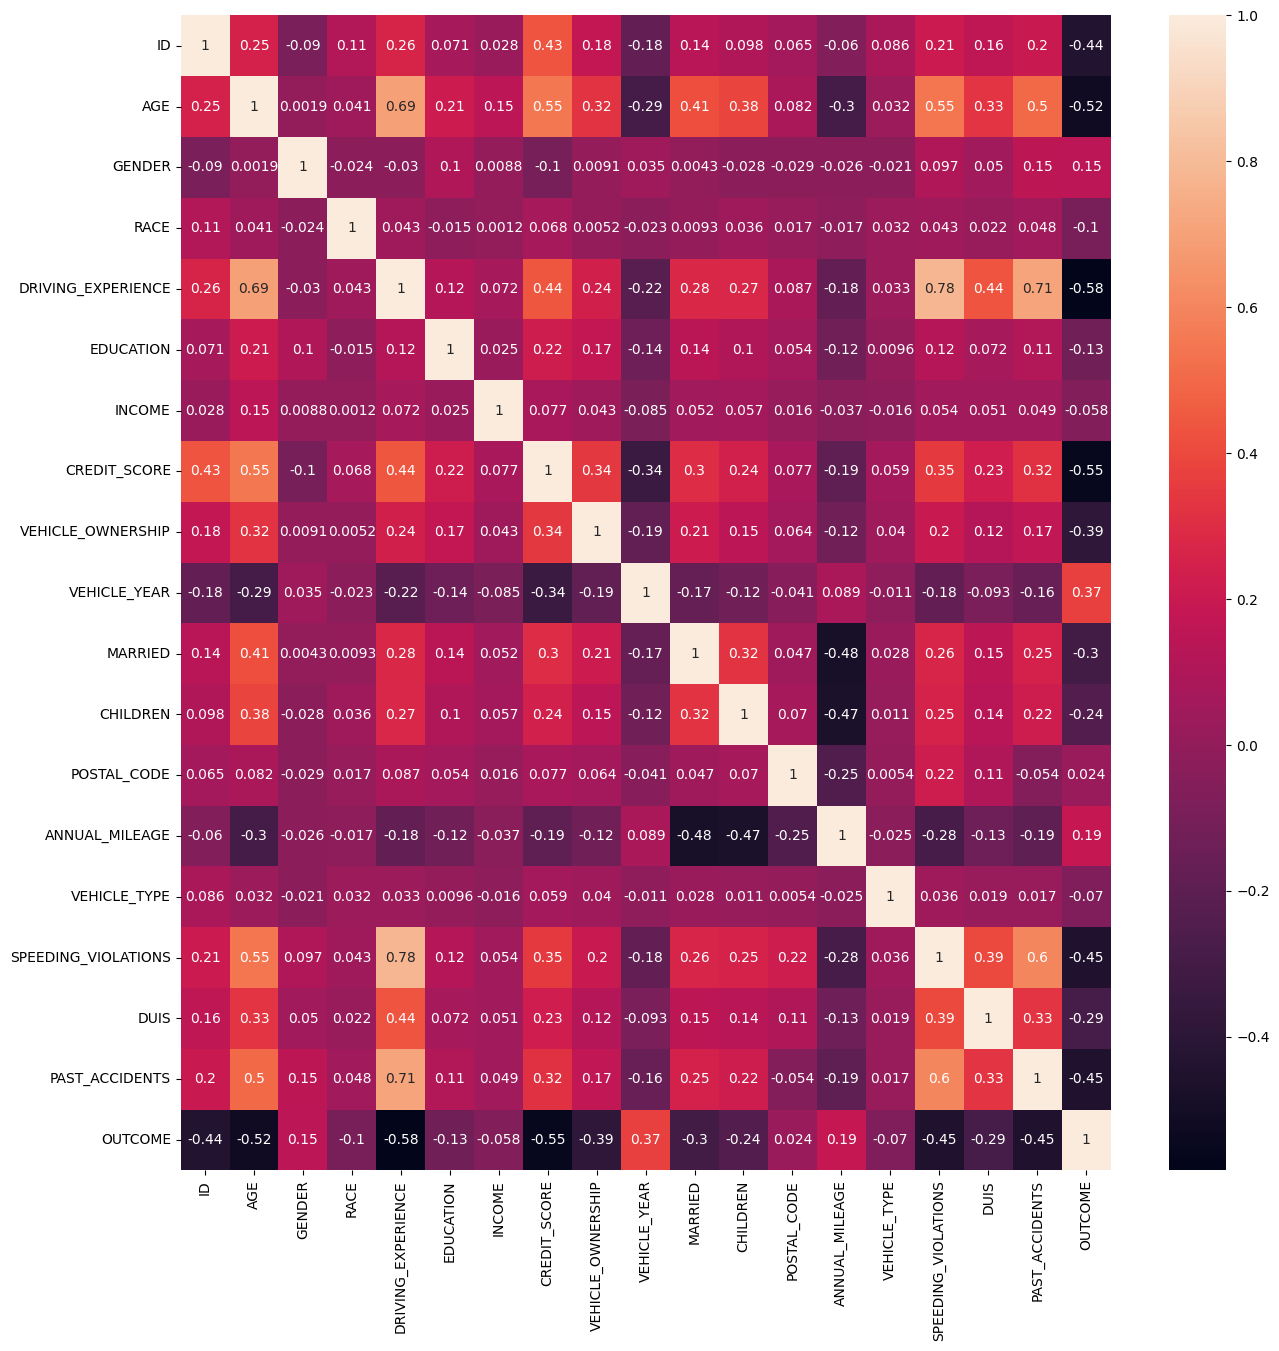

In [38]:
fig, ax = plt.subplots(figsize=(15, 15))  
sns.heatmap(train_set.corr(method = "spearman"), annot = True, ax = ax)

In [39]:
corr_matrix = train_set.corr()
print(corr_matrix["OUTCOME"].sort_values(ascending=False))

OUTCOME                1.000000
VEHICLE_YEAR           0.374046
ANNUAL_MILEAGE         0.190442
GENDER                 0.148210
POSTAL_CODE           -0.014379
INCOME                -0.043350
VEHICLE_TYPE          -0.070375
RACE                  -0.100076
EDUCATION             -0.135628
CHILDREN              -0.238904
DUIS                  -0.269526
MARRIED               -0.303051
SPEEDING_VIOLATIONS   -0.381491
VEHICLE_OWNERSHIP     -0.389078
PAST_ACCIDENTS        -0.396042
ID                    -0.399822
AGE                   -0.514518
CREDIT_SCORE          -0.550986
DRIVING_EXPERIENCE    -0.571803
Name: OUTCOME, dtype: float64
